# Introduction

The Machine Learning technique used will be Gradient Boosting, specifically Gradient Boosting without a verifier. Gradient Boosting Regressor is a machine learning algorithm that uses a series of decision trees to make predictions. Each tree is trained to correct the errors of the previous trees, which results in a more accurate overall prediction.


---

Before running the code, first check if SHAP is already in library. If it is not, install using given code, the same applies to *os*. SHAP is an interpretability tool that will help us to see the contribution of each feature towards machine learning predictions.

In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.


The following libraries will be imported to be able to run the code.

Since we are working with Gradient Boost, most of the libraries used are from "sklearn package", which includes:

**sklearn-metrics**


---


- **accuracy_score** - The function calculates the accuracy of a subset.
> For more information visit: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- **r2_score** - Used to measure how well a linear regression model fits the data.
> For more information visit: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

- **mean_squared_error** - Evaluates the closeness between the regression line and the set of data points. A lower MSE indicates that the regression line is a better fit for the data.
> For more information visit: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


**sklearn**

---



- **dataset** - Embeds some datasets, they can be small refers as toy datasets or large as real-world datasets so the user can apply it to its machine learning algorithm.
> For more information visit: https://scikit-learn.org/stable/datasets.html
- **ensemble** - Allows for the optimization of arbitrary differentiable loss function of the machine learning model.
> For more information visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor


---

Additionally we have SHAP and os, as explained before, SHAP is an interpretabilty tool which helps to evaluate the contribution of each feature towards predictions. Os is particularly used to concatenate path components with exactly one directory separator "/", and create one path.
  
> See the links below for more information in the packages:
- **SHAP** - https://shap.readthedocs.io/en/latest/
- **os** - https://www.geeksforgeeks.org/python-os-path-join-method/

The other packages contain python features such as 'pandas' and 'numpy', which helps obtain the mean and standard deviation.

> See the links below to more information in the packages:
- **Pandas** - https://pandas.pydata.org/docs/user_guide/index.html
- **Numpy** - https://numpy.org/doc/stable/

In [ ]:
from xgboost import XGBRegressor
import os
import pandas as pd
import numpy as np
import shap
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

- The user will then be asked to input the name of the dataset.

 An example would be:
 > *Enter the name of the dataset:* **ARM**

In [ ]:
name = input("Enter the name of the dataset: ")

Enter the name of the dataset:  XGB_BigRunWS


- Paths will be constructed based on the zone and name.

 An example would be:
> *Enter the home directory where the datasets are located:* **/content/ARM_1/**

In [ ]:
home_directory = input("Enter the home directory where the datasets are located: ")

Enter the home directory where the datasets are located:  /mnt/e/share/BIgRun/ML-DownScale_SMERGE_CEES-main


- Input the name of the testing dataset, this will be used to construct the full path.

 An example would be:
 > *Enter the name of the testing dataset:* **ERA1_2ARM_100m_dataV1_test.csv**

- While the code is running it will also be checking if the testing file exists. If the file does not exist, then the code will prompt the user until a valid file is provided.

In [ ]:
test_dataset_name = input("Enter the name of the testing dataset (including file extensions): ")

test_file = os.path.join(home_directory, test_dataset_name)

while not os.path.exists(test_file):
  print("The specified training file does not exist. Enter the correct dataset name.")
  test_dataset_name = input("Enter the name of the testing dataset (including file extensions): ")
  test_file = os.path.join(home_directory, test_dataset_name)

Enter the name of the testing dataset (including file extensions):  BigRunWS_500_inst.csv


- Input the name of the training dataset, this will be used to construct the full path.

 An example would be:
 > *Enter the name of the training dataset:* **ERA1_2ARM_1000m_dataV1_train.csv**

- While the code is running it will also be checking if the training file exists. If the file does not exist, then the code will prompt the user until a valid file is provided.

In [ ]:
train_dataset_name = input("Enter the name of the training dataset (including file extensions): ")

train_file = os.path.join(home_directory, train_dataset_name)

while not os.path.exists(train_file):
  print("The specified training file does not exist. Enter the correct dataset name.")
  train_dataset_name = input("Enter the name of the training dataset (including file extensions): ")
  train_file = os.path.join(home_directory, train_dataset_name)

Enter the name of the training dataset (including file extensions):  BigRunWS_500_train_4.csv


# Variables

- Prior to exporting testing and training data, it is necessary to create and upload a text file list (comma-separated values) containing the names of all variables (including the target variable). The text file must be saved in the same folder as the training and testing files.

- Given that the variable names can vary depending on the user's data, it is more convenient to create a separate file with the variable names and then adjust them to the code.

- An example of the list of variables would be:

 > *PageName*, *Clay*, *Sand*, *Silt*, *Elevation*, *Slope*, *Ascept*, *NDVI*, *SMERGE*

In [ ]:
variables_list_name = input("Enter the name of the variables list (make sure the file is in text file format): ")
variables_file = os.path.join(home_directory, variables_list_name)

while not os.path.exists(variables_file):
  variables_list_name = input("The variable list txt was not found, it should be in the home directory, try again ")
  variables_file = os.path.join(home_directory, variables_list_name)

text_file = open(variables_file, "r")
variables = text_file.read().split(',')

Enter the name of the variables list (make sure the file is in text file format):  vars.txt


# Testing Data

- First, we created a variable called *test_data* to read our testing data, then using *variables* from the previous section we will save all of the data into *test_data*. Testing data is going to help us measure the performance of our model.


In [ ]:
test_data = pd.read_csv(test_file)
test_data = test_data.loc[:, variables]

>**Warning:**
Before separating the predictor variables from the target variable, we created a filter to make sure the data saved will be compatible with Gradient Boost. This machine learning module is created to deal with numeric values only.

- The following code will remove all the *object type* column variables from the testing set, create new variables that will hold those columns, and eventually create a list of all of the columns that will be removed.
  - **Object type** columns variables refers to the columns that contain a combination of strings, letters, and numbers. Gradient Boost is compatible only with numeric values.

- As a result, prior to applying the testing set to the Gradient Boost model, we must eliminate those columns.

- However, if you want to keep that variable as part of your variables for the model, make sure to format that column beforehand for both testing and training sets.

- In our case, we dealt with a variable called  *PageName*.
  - **PageName** - This variable holds string values and can not be used in our model. However, the variable holds the position grids of the data by coordinates with letters and numbers such as B2.

- Although **PageName** was not part of the Gradient Boost model predictions, it was saved in a variable separately so that it could be added back into the final prediction output. The variable will be called *index variable*. If this is the case for you, and you want to save your data to place back into the output, you will be able to use the variables that this section will create. Otherwise, if you are just planning to remove them, you can just run this section and move on to the next one.

In [ ]:
def process_object_columns(dataframe, dex):
  def get_object_columns(df):
    return list(df.select_dtypes(include=['object']).columns)

  # Function to get object type columns
  object_columns = get_object_columns(dataframe)

  if dex in object_columns:
    object_columns.remove(dex)

  print("Object type columns:", object_columns)
  # Removing columns with 'object' dtype
  df_without_objects = dataframe.drop(object_columns, axis=1)

  # Creating separate variables for object type columns with their respective names
  for col in object_columns:
    globals()[f"{col}"] = dataframe[col]

  # Printing separate variables
  for col in object_columns:
    print(f"{col}:")
    print(globals()[f"{col}"])

  # Returning the original DataFrame without object type columns
  return df_without_objects

- Input the name of the index variable, which will be integrated in the output dataframe.

In [ ]:
index_variable = input("Enter the index variable from the list of variables: ")

Enter the index variable from the list of variables:  PageName


In [ ]:
test_data = process_object_columns(test_data,index_variable)

Object type columns: []


*   After removing the object type columns, this is how the new test data looks like:


In [ ]:
test_page = test_data[index_variable]
test_data.drop(columns=[index_variable], inplace=True)

In [ ]:
print(test_data)

             Clay       Sand       Silt   Elevation      Aspect     Slope  \
0       34.103347   6.213517  59.683060  538.559735  144.169265  0.963445   
1       35.139732   6.290044  58.570166  535.214457  163.814330  1.365451   
2       33.554668   6.155673  60.289564  535.567550  149.415482  0.478122   
3       33.669880   6.249533  60.080510  533.273934  137.600925  0.940901   
4       30.837869  12.809110  56.352965  529.432486  161.418493  2.298457   
...           ...        ...        ...         ...         ...       ...   
402829  22.939871  39.091821  37.968307  222.916803  215.751611  1.995111   
402830  17.787609  55.510363  26.702089  283.863551  123.379235  4.100042   
402831  20.178704  39.672646  40.148705  280.559535  238.454415  3.812985   
402832  16.466797  57.842202  25.691062  291.602615  142.782750  2.887056   
402833  18.494068  51.624559  29.881410  282.089283  218.237928  3.403711   

             MODIS    Smerge    LAI      ALB       Temp  
0       143.75000

- The next step is to create a variable that holds date columns.
  - Since the *date* column is a component of our predictor variables, we must format its numerical values to a value that GBoost can interpret as a date, rather than just a number. However, before formatting the *date* column, we create this **date** variable to preserve its original format and then insert it back into the output frame. The date format that can be taken can be found in the **Date Formatting** section.

In [ ]:
date = pd.read_csv(test_file, usecols=['Date'])

# Date Formatting
- For regression models it is important to follow the required formatting to make sure to have a high perfomance. This section will change the date format to a *to_datetime* format which works better with machine learning regression models.Therefore, there will be a date formatting for both testing and training sets.
>**Note:** This section only allows three types of date formats : "%m/%d/%Y", "%Y/%m/%d", and "%Y/%j". If you are using another type of format make sure to change it to one of those formats beforehand.


In [ ]:
def date_formatting(dataframe2):
    # Processing 'Date' column for testing
    date_format = input('If file use "%m/%d/%Y" type: A, if "%Y/%m/%d" type: B, else "%Y/%j" type C: ')
    #date_column = dataframe2[column_name]
    while date_format != 'A' and date_format != 'B' and date_format != 'C':

        date_format = input('Input ERROR. If file use "%m/%d/%Y" type: A, if "%Y/%m/%d" type: B, else if "%Y/%j" type C: ')

    if date_format == 'A':

        #date_format = '%m%d%Y'
        dataframe2['Date'] = pd.to_datetime(date['Date'], format="%m/%d/%Y")
        dataframe2['Date'] =  dataframe2['Date'].astype(int)

    if date_format == 'B':

        #date_format = '%Y/%m/%d'
        dataframe2['Date'] = pd.to_datetime(date['Date'], format = '%Y/%m/%d')
        #.astype(int)
        dataframe2['Date'] =  dataframe2['Date'].astype(int)

    if date_format == 'C':

        #date_format = '%Y/%j'
        dataframe2['Date'] = pd.to_datetime(date['Date'], format="%Y/%j")
        dataframe2['Date'] =  dataframe2['Date'].astype(int)
    #else:
      #print ("Data format not recognized, make sure your data is formatted as %m%d%Y, %Y%m%d, or %Y%j")
     # date_format = 0
    return dataframe2

In [ ]:
test_data = date_formatting(test_data)

If file use "%m/%d/%Y" type: A, if "%Y/%m/%d" type: B, else "%Y/%j" type C:  A


*   Lastly, to get the testing data ready, you need to separate the predictor variables from the target variable.

In [ ]:
# Separating target variable (dependent) from the initial variables (independent).
target_variable = input("Write the name of the target variable to extract it from the list of variables: ")
variables = test_data.columns.tolist()

while target_variable in variables:
    variables.remove(target_variable)

y_test = test_data[target_variable]
x_test = test_data[variables]

Write the name of the target variable to extract it from the list of variables:  Smerge


# Training Data

- First, we create a variable called *train_data* to read our training data. Then, using *variables* from the previous section, we save all of the data into *train_data*. The training data will be used to create our model and make it able to create predictions.

  > **Note:** Since we already removed the object type columns in a previous section we will use  *variables* from the **Variables** section to retrieve just the numerical columns values and define **x_train**. Addtionally, we will use **target_variable** from testing data to also define **y_train** in the training data.

In [ ]:
train_data = pd.read_csv(train_file)

- Prior to defining the predictor variables (**x_train**) and target variable (**y_train**) for training, we must also format the date for the training data.
  - To do this, we will use the same function that we used in the **Date Formatting** section.

In [ ]:
train_data.drop(columns=[index_variable], inplace=True)
variables.remove(index_variable)

In [ ]:
train_data.dropna(inplace=True)
train_data = date_formatting(train_data)
try:
    train_data.drop(columns=[index_variable], inplace=True)
except:
    print()
try:
    variables.remove(target_variable)
    variables.remove(index_variable)
except:
    print()
# Defining x_train and y_train
x_train = train_data[variables]
y_train = train_data[target_variable]

If file use "%m/%d/%Y" type: A, if "%Y/%m/%d" type: B, else "%Y/%j" type C:  A


# eXtreme Gradient Boost parameters

eXtreme Gradient Boost is a ML-technique with its own package of tools and functions. XGBoost is a tree-based algorithm that builds a series of decision trees to make accurate predictions, while controlling the model complexity with regularization. However, as other machine learning models, to improve the machine learning model perfomance, we need to tune the parameters of the model and get the best parameters also known as hypertunning parameters. The hypertuning parameters were conducted using an iteration method. A series of tuning values were tested and the best parameters were found after hundreds of trials.

---


- **verbose** - *int*; Enable verbose output:
  - If 1 is specified, the program will print progress and performance information periodically (less frequently for larger trees).
  - If a value greater than 1 is specified, the program will print progress and performance  information for every tree.
- **n_estimators** - *int*; The number of times to repeat the process of training a model on the residuals of the previous model. A large number of iterations will result in better performance.
- **max_depth** - *int* or *None*; The maximum number of levels in the decision tree.
- **tree_method** - *string*; The algortihm method to use for building decision trees, which can depend on training speed and memory usage.


> For more information visit: https://xgboost.readthedocs.io/en/stable/parameter.html

---

Before jumping into the machine learning configuration, there is one last processing step we need to take. Since machine learning models work best with numbers, and the formatting of the data gathered can sometimes vary, we need to convert our *x_train*, *y_train*, and *x_test* into number types using the numpy function to ensure that our algorithm runs smoothly.

In [ ]:
x_train_nu = x_train.to_numpy()
y_train_nu = y_train.to_numpy()
x_test_nu = x_test.to_numpy()

*Configuring the eXtreme Gradient Boost Regressor*

---

- The parameters that were used for XGBoost are inside the XGBRegressor function.


- The variable *'mse'* represents the mean squared error and is obtained by using the target variable (dependent variable) and the regression prediction of the initial variables (independent variables).

In [ ]:
model = XGBRegressor(verbosity=1, n_estimators=500, max_depth=10, tree_method='hist')
model.fit(x_train_nu, y_train_nu)

MSE = mse(y_test, model.predict(x_test_nu))
print("The mean squared error (MSE) on the set: {:.4f}".format(MSE))

The mean squared error (MSE) on the set: 0.0010


- By obtaining the prediction of the test model, we will prepare for the output dataframe.

- Then we took the date that we saved earlier with its original format and incorporated it back to the output dataframe. The same steps were made for the index variable and ML.

- Finally, we saved the output data frame as *.csv* using the name you inputted at the beginning.

In [ ]:
predictions = model.predict(x_test_nu)
test_data['Date'] = date
test_data['ML'] = predictions
test_data[index_variable] = test_page

## Saving the output dataframe to a CSV file
test_data.to_csv(name + ".csv", index=False)

# SHapley Additive exPlanations (SHAP)

SHAP states the output of the ML model by carrying out the contribution from each variable to the prediction. SHAP was used to evaluate independent variable sensitivity. SHAP uses a game theory-based methodology that calculates feature importance by comparing a model's predictions with and without a particular feature. For our case, we used a random sample of 1000 from the train data. We then apply SHAP to analyze those 1000 row samples and calculate the contribution of each feature for the 1000 predictions. SHAP assigns values according to the mean marginal contribution of each feature across all possible values. Using this method, you will be able to see a bar graph that illustrates the individual contribution of each feature. The graph is arranged from highest contribution to lowest contribution feature.

> For more information visit: https://shap.readthedocs.io/en/latest/

 99%|===================| 993/1000 [02:25<00:01]        

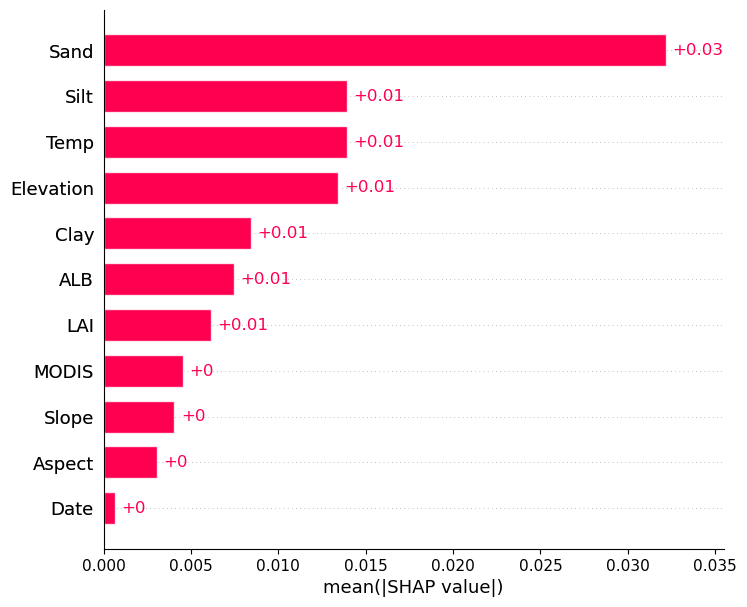

In [ ]:
# Generating variable importance plots
X_sampled = x_train.sample(1000, random_state=10, replace=True)

explainer = shap.Explainer(model, X_sampled)
shap_values = explainer(X_sampled)
number_variables = len(variables)
shap.plots.bar(shap_values, max_display=number_variables)

## Saving variable importance plot
mean_shap = np.abs(shap_values.values).mean(axis=0)
shap_pd = pd.DataFrame(mean_shap, index=X_sampled.columns).sort_values(by=[0], ascending=False)
shap_pd.to_csv(name + '_SHAP.csv')